# Figures 2a, and 2b, supplementary 3, and SNP stats: H5N1 within-host variant plots and summary statistics

June 6, 2019

This notebook contains code for producing the following figures and analyses:

**1. Figure 2a:** This plot shows all SNPs > 1% in all human and duck samples, faceted by gene. 

**2. Supplemental figure 3:** The same as figure 1, but faceted by gene and sample, so each sample's SNPs are plotted independently. 

**3. Figure 2b:** A frequency spectrum showing the proportion of the total SNPs that fall into each frequency bin (1-10%, 10-20%, etc...).

**4. SNPs statistics:** Calculations for the mean SNP frequency for birds and humans, and the mean number of SNPs per sample for birds and humans, total number of SNPs called, etc.. 

In [1]:
import sys, subprocess, glob, os, shutil, re, importlib, Bio
from subprocess import call
from Bio import SeqIO
import pandas as pd
import numpy as np
from scipy import stats
import rpy2
%load_ext rpy2.ipython

In [2]:
# define colors 

# blue/red scheme 1 (desaturated)
human_color = "#C75643"
duck_color = "#545AB7"


# blue/red scheme 1 (desaturated)
duck_nonsyn_color = "#545AB7"
duck_syn_color = "#98B4DA"
human_nonsyn_color = "#C75643"
human_syn_color = "#E6B692"

In [3]:
# variant calls file to load in
variant_calls = "../data/within-host-variants-1%.tsv"

## Figure 1a: All within-host SNPs 

In [4]:
snps_df = pd.read_csv(variant_calls, sep='\t', header='infer')
snps_df.head()

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10
0,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_H5,A/duck/Cambodia/381W11M4/2013,HA,793,G,A,Ala265Thr,nonsynonymous,3.28%,0.0328,NaN
1,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_NP,A/duck/Cambodia/381W11M4/2013,NP,384,A,G,Gln117Arg,nonsynonymous,20.43%,0.2043,NaN
2,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,939,A,G,Ala307Ala,synonymous,4.55%,0.0455,NaN
3,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1118,G,A,Arg367Lys,nonsynonymous,19%,0.1900,NaN
4,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1608,G,A,Pro530Pro,synonymous,4.38%,0.0438,NaN


In [5]:
# add in a species column
snps_df['species'] = snps_df['sample'].str.contains("duck")
snps_df['species'] = snps_df['species'].replace(True,"duck")
snps_df['species'] = snps_df['species'].replace(False,"human")
snps_df.head()

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10,species
0,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_H5,A/duck/Cambodia/381W11M4/2013,HA,793,G,A,Ala265Thr,nonsynonymous,3.28%,0.0328,NaN,duck
1,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_NP,A/duck/Cambodia/381W11M4/2013,NP,384,A,G,Gln117Arg,nonsynonymous,20.43%,0.2043,NaN,duck
2,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,939,A,G,Ala307Ala,synonymous,4.55%,0.0455,NaN,duck
3,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1118,G,A,Arg367Lys,nonsynonymous,19%,0.1900,NaN,duck
4,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1608,G,A,Pro530Pro,synonymous,4.38%,0.0438,NaN,duck


In [6]:
# get rid of the incorrect variant call due to a mismatched reference base
snps_df = snps_df[snps_df['coding_region_change'] != 'Xaa240Gly']
snps_df.head()

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10,species
0,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_H5,A/duck/Cambodia/381W11M4/2013,HA,793,G,A,Ala265Thr,nonsynonymous,3.28%,0.0328,NaN,duck
1,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_NP,A/duck/Cambodia/381W11M4/2013,NP,384,A,G,Gln117Arg,nonsynonymous,20.43%,0.2043,NaN,duck
2,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,939,A,G,Ala307Ala,synonymous,4.55%,0.0455,NaN,duck
3,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1118,G,A,Arg367Lys,nonsynonymous,19%,0.1900,NaN,duck
4,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1608,G,A,Pro530Pro,synonymous,4.38%,0.0438,NaN,duck


In [7]:
# change NAs to neuramindase
snps_df['gene'].fillna('neuraminidase', inplace=True)

In [8]:
snps_df['color'] = snps_df['species'] + "_" + snps_df['synonymous_nonsynonymous']
snps_df.head()

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10,species,color
0,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_H5,A/duck/Cambodia/381W11M4/2013,HA,793,G,A,Ala265Thr,nonsynonymous,3.28%,0.0328,NaN,duck,duck_nonsynonymous
1,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_NP,A/duck/Cambodia/381W11M4/2013,NP,384,A,G,Gln117Arg,nonsynonymous,20.43%,0.2043,NaN,duck,duck_nonsynonymous
2,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,939,A,G,Ala307Ala,synonymous,4.55%,0.0455,NaN,duck,duck_synonymous
3,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1118,G,A,Arg367Lys,nonsynonymous,19%,0.1900,NaN,duck,duck_nonsynonymous
4,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1608,G,A,Pro530Pro,synonymous,4.38%,0.0438,NaN,duck,duck_synonymous


TableGrob (3 x 2) "arrange": 4 grobs
  z     cells    name                  grob
1 1 (1-1,2-2) arrange       gtable[arrange]
2 2 (2-2,2-2) arrange       gtable[arrange]
3 3 (3-3,2-2) arrange text[GRID.text.11547]
4 4 (1-3,1-1) arrange text[GRID.text.11548]


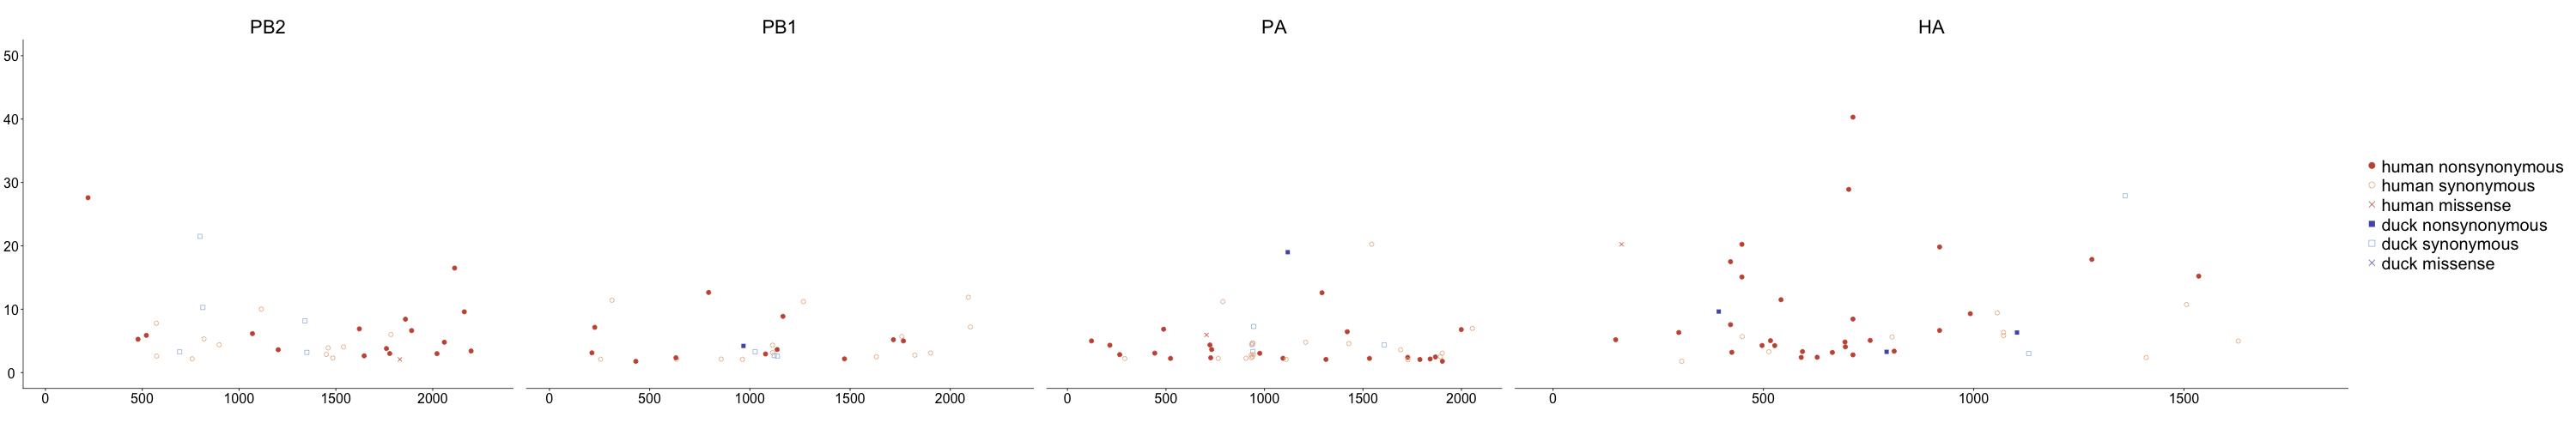

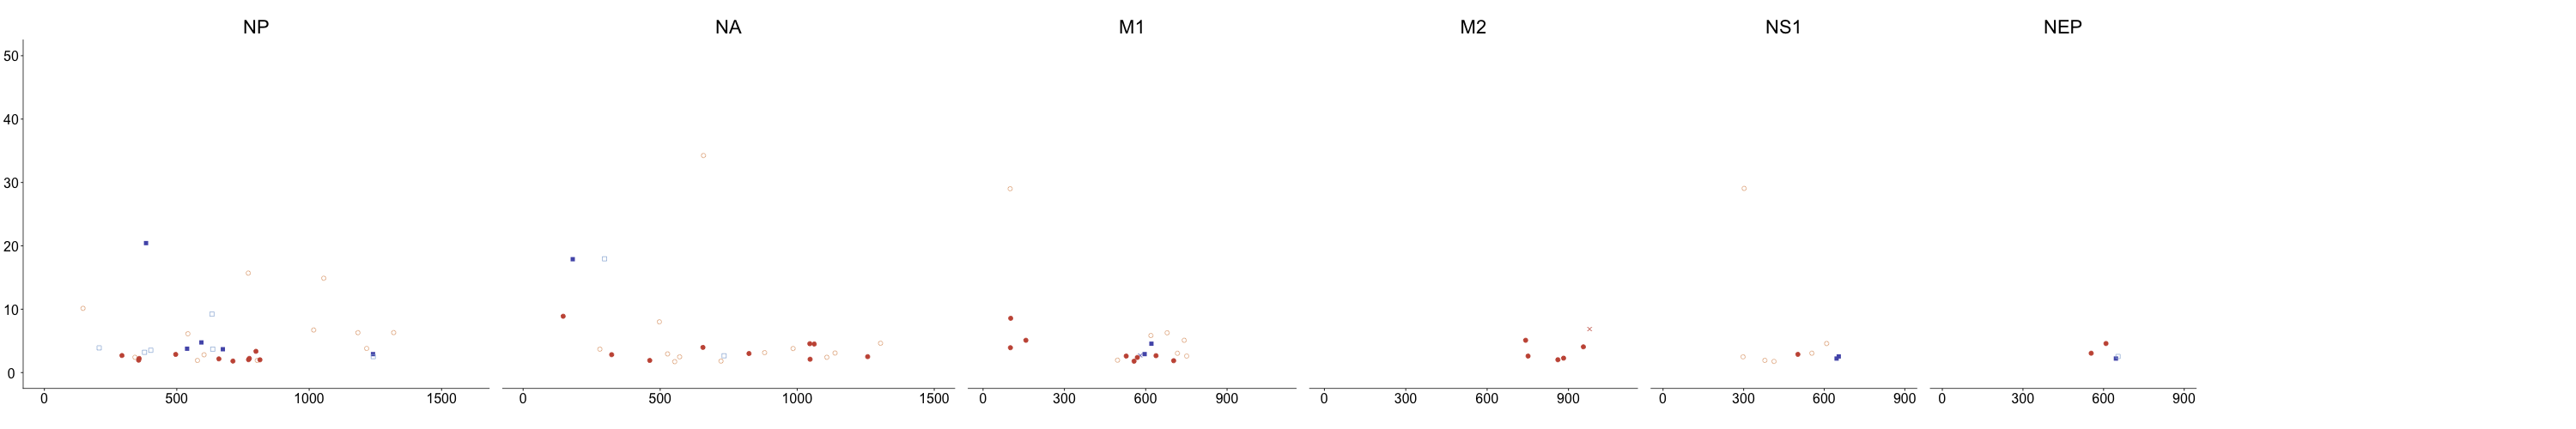

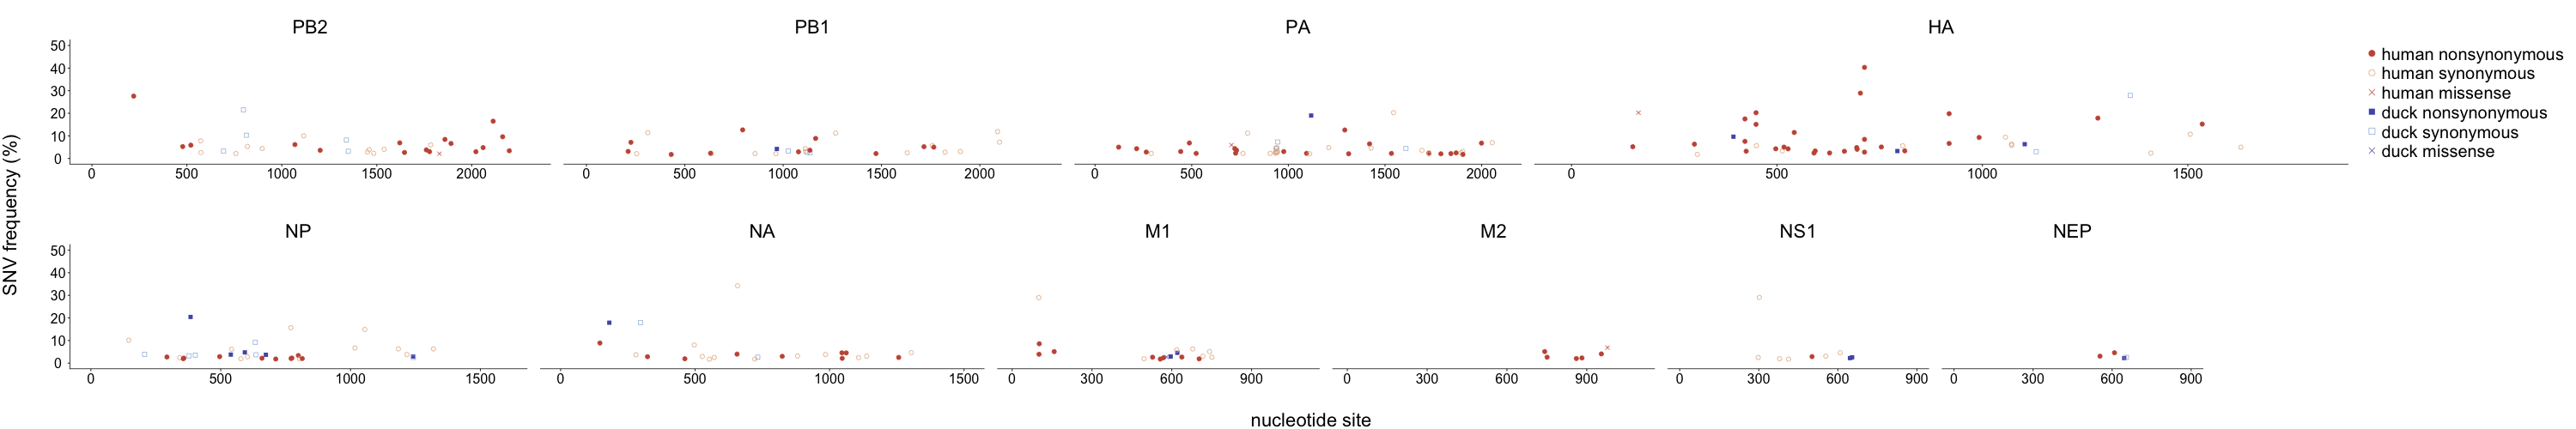

In [56]:
%%R -w 3000 -h 500 -u px -i snps_df,human_nonsyn_color,human_syn_color,duck_nonsyn_color,duck_syn_color  # this sets the size of the plot...otherwise, it will go off the page"

require(ggplot2)
library(ggplot2)
require(grid)
library(grid)
require(gridExtra)
library(gridExtra)
        
snps_df$gene = gsub("neuraminidase","NA", snps_df$gene)
snps_df$gene_f = factor(snps_df$gene, levels=c('PB2','PB1','PA','HA','NP','NA','M1','M2','NS1','NEP'))

blank_data <- data.frame(gene_f = c("PB2","PB2","PB1","PB1","PA","PA","HA","HA","NP","NP","NA","NA","M1","M1","M2","M2","NS1","NS1","NEP","NEP"), x = c(0,2500,0,2500,0,2500,0,1800,0,1600,0,1500,0,1200,0,1200,0,1000,0,1000), y = 0, synonymous_nonsynonymous="nonsynonymous",species='duck',color=c('duck_missense'))

snps_df$color = gsub("stop_gained","missense", snps_df$color)

genes = c('PB2','PB1','PA','NP','NA','M1','M2','NS1','NEP')
stops = list('PB2'=2300,'PB1'=2300,'PA'=2100,'HA'=1800,'NP'=1600,'NA'=1500,'M1'=1100,'M2'=1100,'NS1'=900,'NEP'=900)
steps = list('PB2'=500,'PB1'=500,'PA'=500,'HA'=500,'NP'=500,'NA'=500,'M1'=300,'M2'=300,'NS1'=300,'NEP'=300)
plots = list()

for (g in genes)
{
    df = snps_df[snps_df$gene == g,]
    stop = stops[[g]]
    step = steps[[g]]
    name = paste(g, "plot",sep = '_')
    
    # set PB2 and NP-specific y-axis aesthetics
    if (g == "PB2"| g == 'NP'){
        y_aesthetics = theme(axis.line.y=element_line(colour="black"))+
        theme(axis.text.y=element_text(hjust=0.5))            
    } else {
        y_aesthetics = theme(axis.line.y=element_blank())+
        theme(axis.ticks.y= element_blank())+
        theme(axis.text.y=element_blank())
    }
        
    p <- ggplot(df, aes(x=reference_position, y=frequency*100, shape=color, colour=color))+
        geom_point(size=2)+
        geom_blank(data = blank_data, aes(x = x, y = y))+
        theme(panel.grid.major=element_line(colour=NA,size=NA))+
        theme(panel.grid.minor=element_line(colour=NA,size=NA))+
        theme(plot.title=element_text(size=22, hjust=0.5))+
        theme(strip.background = element_rect(colour=NA, fill=NA))+
        theme(plot.margin=unit(c(0.8,0.3,1,0.15),"cm"))+    # this sets the plot margins as top, left, bottom, right
        theme(axis.line.x=element_line(colour="black"))+
        theme(axis.title.y=element_blank())+#text(size=16, hjust=0.5, vjust=0.5))+
        theme(axis.title.x=element_blank())+#text(size=16, vjust=0.5))+
        theme(axis.text=element_text(size=16, colour="black"))+
        y_aesthetics+
        scale_shape_manual(name="type",values=c(human_nonsynonymous=19, human_synonymous=1,human_missense=4,duck_nonsynonymous = 15, duck_synonymous = 0,duck_missense=4),breaks=c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"), guide=FALSE)+
        scale_color_manual(name="type", values=c(human_nonsynonymous=human_nonsyn_color, human_synonymous=human_syn_color,human_missense=human_nonsyn_color, duck_nonsynonymous = duck_nonsyn_color, duck_synonymous = duck_syn_color, duck_missense=duck_nonsyn_color),breaks = c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"),guide=FALSE)+
        theme(legend.text=element_text(size=20))+
        theme(legend.title=element_blank())+
        theme(panel.margin=unit(1, "lines"))+
        theme(panel.background=element_rect(fill=NA, color=NA))+
        theme(legend.key=element_rect(fill=NA))+
        theme(legend.key.size=unit(0.8, "cm"))+   # alter this to make legend items further apart
        labs(x="\nnucleotide site",y="SNP frequency (%)\n", title=g)+
        theme(legend.direction = 'horizontal', legend.position = 'right')+
        scale_y_continuous(limits=c(0,50))+
        scale_x_continuous(limits=c(0,stop), breaks=seq(0,stop,step))
    
    plots[[name]] <- p
} 

## add a plot for HA with a legend 
df = snps_df[snps_df$gene == "HA",]
ha <- ggplot(df, aes(x=reference_position, y=frequency*100, shape=color, colour=color))+
    geom_point(size=2)+
    geom_blank(data = blank_data, aes(x = x, y = y))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+
    theme(plot.title=element_text(size=22, hjust=0.5))+
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(plot.margin=unit(c(0.8,0.3,1,0.15),"cm"))+    # this sets the plot margins as top, left, bottom, right
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.title.y=element_blank())+#text(size=16, hjust=0.5, vjust=0.5))+
    theme(axis.title.x=element_blank())+#text(size=16, vjust=0.5))+
    theme(axis.text=element_text(size=16, colour="black"))+
    theme(axis.line.y=element_blank())+
    theme(axis.ticks.y= element_blank())+
    theme(axis.text.y=element_blank())+
    scale_shape_manual(name="type",values=c(human_nonsynonymous=19, human_synonymous=1,human_missense=4,duck_nonsynonymous = 15, duck_synonymous = 0,duck_missense=4),breaks=c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"))+
    scale_color_manual(name="type", values=c(human_nonsynonymous=human_nonsyn_color, human_synonymous=human_syn_color,human_missense=human_nonsyn_color, duck_nonsynonymous = duck_nonsyn_color, duck_synonymous = duck_syn_color, duck_missense=duck_nonsyn_color),breaks = c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"))+
    guides(shape = guide_legend(ncol = 1), colour = guide_legend(override.aes = list(size=3)))+ 
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(panel.background=element_rect(fill=NA, color=NA))+
    theme(legend.key=element_rect(fill=NA))+
    theme(legend.key.size=unit(0.8, "cm"))+   # alter this to make legend items further apart
    labs(x="\nnucleotide site",y="SNV frequency (%)\n", title="HA")+
    theme(legend.direction = 'horizontal', legend.position = 'right')+
    scale_y_continuous(limits=c(0,50))+
    scale_x_continuous(limits=c(0,1800), breaks=seq(0,1800,500))

extra <- ggplot()+theme(panel.background=element_rect(fill=NA, color=NA))

top <- grid.arrange(plots[[1]],plots[[2]],plots[[3]],ha,ncol=4, widths=c(0.2,0.2,0.18,0.41))
bottom <- grid.arrange(plots[[4]],plots[[5]],plots[[6]],plots[[7]],plots[[8]],plots[[9]], extra, ncol=7, widths=c(0.16,0.15,0.11,0.11,0.09,0.09,0.12))
p <- grid.arrange(top, bottom, left = textGrob("SNV frequency (%)\n", gp=gpar(fontsize=22), rot=90), bottom=textGrob("nucleotide site", gp=gpar(fontsize=22)))

ggsave("Fig-1a-all-SNVs.pdf", p, width = 16, height = 5, path="figure-PDFs")
p

## Supplementary Figure 3: plot a supplemental figure faceted by gene and sample

For ease of plotting, I need to add in dummy data so that there is a facet for each gene and sample that gets plotted.

In [15]:
snps_df2 = snps_df[["sample","gene","reference_position","synonymous_nonsynonymous","frequency","species","color"]]
snps_df2.head()

,sample,gene,reference_position,synonymous_nonsynonymous,frequency,species,color
0,A/duck/Cambodia/381W11M4/2013,HA,793,nonsynonymous,0.0328,duck,duck_nonsynonymous
1,A/duck/Cambodia/381W11M4/2013,NP,384,nonsynonymous,0.2043,duck,duck_nonsynonymous
2,A/duck/Cambodia/381W11M4/2013,PA,939,synonymous,0.0455,duck,duck_synonymous
3,A/duck/Cambodia/381W11M4/2013,PA,1118,nonsynonymous,0.1900,duck,duck_nonsynonymous
4,A/duck/Cambodia/381W11M4/2013,PA,1608,synonymous,0.0438,duck,duck_synonymous


In [19]:
%%R -w 1000 -h 500 -u px -i snps_df2,human_nonsyn_color,human_syn_color,duck_nonsyn_color,duck_syn_color  # this sets the size of the plot...otherwise, it will go off the page\n",

require(ggplot2)
library(ggplot2)

dummy = "#ffffff"

snps_df2$color = gsub("stop_gained","missense", snps_df2$color)

# this block of code is to ensure that even genes without SNPs get plotted in the facet plot. For each gene and 
# sample, if there are no SNPs in that gene and sample, make a dummy row of data with a SNP at 0% frequency
samples = unique(snps_df2$sample)
gene_list = unique(snps_df2$gene)
for (sample in samples)
{
    for (gene in gene_list)
    {
        x = snps_df2[snps_df2$sample == sample & snps_df2$gene == gene,]
        if (nrow(x) == 0){
            reference_position = 1
            synonymous_nonsynonymous = "synonymous"
            frequency = 0
            species = "dummy"
            color = "dummy"
            row_to_append = data.frame(sample,gene,reference_position, synonymous_nonsynonymous, frequency, species, color)
            snps_df2 = rbind(snps_df2, row_to_append)
        }
    }
}


# this block of code generates a blank data, dataframe that can be used to set the x limits on the facet plot
blank_data = data.frame()

samples = unique(snps_df2$sample)
gene_list = unique(snps_df2$gene)

# first, add in the 0/start lines
for (sample in samples)
{
    for (gene in gene_list)
    {
        x = 0
        y = 0
        a = data.frame(sample, gene, x, y)
        blank_data = rbind(blank_data, a)
    }
}

# then add in the stop lines 
for (sample in samples)
{
    for (gene in gene_list)
    {
        y = 0
        if (gene == "PB2" | gene == "PB1" | gene == "PA"){
            x = 2500
        } 
        if (gene == "HA" | gene == "NP"){
            x = 2000
        }
        if (gene == "NA"){
            x = 1500
        }
        if (gene == "M1" | gene == "M2"){
            x = 1200
        }
        if (gene == "NS1" | gene == "NEP"){
            x = 1000
        }
        
        a = data.frame(sample, gene, x, y)
        blank_data = rbind(blank_data, a)
    }
}

### Now plot
snps_df2$gene = gsub("neuraminidase","NA", snps_df2$gene)
snps_df2$gene_f = factor(snps_df2$gene, levels=c('PB2','PB1','PA','HA','NP','NA','M1','M2','NS1','NEP'))
blank_data$gene = gsub("neuraminidase","NA", blank_data$gene)
blank_data$gene_f = factor(blank_data$gene, levels=c('PB2','PB1','PA','HA','NP','NA','M1','M2','NS1','NEP'))

Sp <- ggplot(snps_df2, aes(x=reference_position, y=frequency, shape=color, colour=color))+
        geom_point(size=3)+
        geom_blank(data = blank_data, aes(x = x, y = y))+
        #geom_blank(data = blank_data, aes(x = x, y = y))+
        facet_wrap(sample~gene_f, scales="free", ncol=10)+
        theme(panel.grid.major=element_line(colour=NA,size=NA))+
        theme(panel.grid.minor=element_line(colour=NA,size=NA))+
        theme(plot.title=element_text(size=13))+
        theme(strip.background = element_rect(colour=NA, fill=NA))+
        theme(plot.margin=unit(c(1,1,1,1),"cm"))+
        theme(axis.line.x=element_line(colour="black"))+
        theme(axis.line.y=element_line(colour="black"))+
        theme(strip.text.x=element_text(size=13))+
        theme(axis.title.y=element_text(size=16, hjust=0.5, vjust=0.5))+
        theme(axis.title.x=element_text(size=16, vjust=0.5))+
        theme(axis.text=element_text(size=12, colour="black"))+
        theme(axis.text.x=element_text(hjust=0.5))+
        theme(legend.text=element_text(size=16))+
        theme(legend.title=element_blank())+
        theme(panel.margin=unit(1, "lines"))+
        theme(panel.background=element_rect(fill=NA, color=NA))+
        theme(legend.key=element_rect(fill=NA))+
        theme(legend.key.size=unit(0.6, "cm"))+   # alter this to make legend items further apart
        labs(x="\nnucleotide site",y="SNP frequency\n")+
        scale_shape_manual(name="type",values=c(dummy=1, human_nonsynonymous=19, human_synonymous=1,human_missense=4,duck_nonsynonymous = 15, duck_synonymous = 0,duck_missense=4),breaks=c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"))+
        scale_color_manual(name="type", values=c(human_nonsynonymous=human_nonsyn_color, human_synonymous=human_syn_color,human_missense=human_nonsyn_color, duck_nonsynonymous = duck_nonsyn_color, duck_synonymous = duck_syn_color, duck_missense=duck_nonsyn_color, dummy=dummy),breaks = c("human_nonsynonymous", "human_synonymous","human_missense","duck_nonsynonymous","duck_synonymous","duck_missense"),labels = c("human nonsynonymous", "human synonymous","human missense","duck nonsynonymous","duck synonymous", "duck missense"))+
        guides(shape = guide_legend(ncol = 1))+ 
        theme(legend.direction = 'horizontal', legend.position = 'right')+
        scale_y_continuous(limits=c(0,0.5))+
        scale_x_continuous(expand = c(0, 0))+
        expand_limits(x = 0)

ggsave("Fig-S3-all-SNPs-2019-06-04.pdf", Sp, width = 40, height = 30, path="figure-PDFs")

## Figure 2b: Frequency spectrum (counts and proportions) of synonymous and nonsynonymous SNPs

Plot the proportion of within-host variants that fall into different frequency bins. Calculate these proportions for each individual sample, and then plot the mean with error bars. Do this separately for humans and ducks, and for nonsynonymous and synonymous SNVs. 

In [30]:
# assign bins to each SNP frequency value 
snps_df['bin'] = ''
snps_df['bin'][snps_df['frequency'] <= 0.1] = '1-10%'
snps_df['bin'][(snps_df['frequency'] > 0.1) & (snps_df['frequency'] <= 0.2)] = '10-20%'
snps_df['bin'][(snps_df['frequency'] > 0.2) & (snps_df['frequency'] <= 0.3)] = '20-30%'
snps_df['bin'][(snps_df['frequency'] > 0.3) & (snps_df['frequency'] <= 0.4)] = '30-40%'
snps_df['bin'][(snps_df['frequency'] > 0.4) & (snps_df['frequency'] <= 0.5)] = '40-50%'
snps_df.head()

/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10,species,color,bin
0,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_H5,A/duck/Cambodia/381W11M4/2013,HA,793,G,A,Ala265Thr,nonsynonymous,3.28%,0.0328,NaN,duck,duck_nonsynonymous,1-10%
1,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_NP,A/duck/Cambodia/381W11M4/2013,NP,384,A,G,Gln117Arg,nonsynonymous,20.43%,0.2043,NaN,duck,duck_nonsynonymous,20-30%
2,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,939,A,G,Ala307Ala,synonymous,4.55%,0.0455,NaN,duck,duck_synonymous,1-10%
3,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1118,G,A,Arg367Lys,nonsynonymous,19%,0.1900,NaN,duck,duck_nonsynonymous,10-20%
4,AJJ9KL706F510_A_duck_Cambodia_381W11M4_2013_PA,A/duck/Cambodia/381W11M4/2013,PA,1608,G,A,Pro530Pro,synonymous,4.38%,0.0438,NaN,duck,duck_synonymous,1-10%


In [31]:
# subset dataframe, and count the number of instances of SNPs in each bin for each species
freq_spec = snps_df[['sample','bin','species']]
freq_spec = pd.DataFrame(freq_spec.groupby(["species", "bin"]).size())
freq_spec.reset_index(inplace=True)
freq_spec.columns = ['species','bin','count']
freq_spec.loc[len(freq_spec)] = ['duck','30-40',0]
freq_spec.loc[len(freq_spec)] = ['duck','40-50',0]
freq_spec.loc[len(freq_spec)] = ['human','40-50',0]
freq_spec

,species,bin,count
0,duck,1-10%,33
1,duck,10-20%,4
2,duck,20-30%,3
3,human,1-10%,180
4,human,10-20%,17
5,human,20-30%,7
6,human,30-40%,1
7,human,40-50%,1
8,duck,30-40,0
9,duck,40-50,0


In [32]:
# subset dataframe, and count the number of instances of SNPs in each bin for each species
freq_spec2 = snps_df[['sample','bin','species','synonymous_nonsynonymous']]
freq_spec2 = freq_spec2[freq_spec2['synonymous_nonsynonymous'] != "stop_gained"]
freq_spec2.head()

,sample,bin,species,synonymous_nonsynonymous
0,A/duck/Cambodia/381W11M4/2013,1-10%,duck,nonsynonymous
1,A/duck/Cambodia/381W11M4/2013,20-30%,duck,nonsynonymous
2,A/duck/Cambodia/381W11M4/2013,1-10%,duck,synonymous
3,A/duck/Cambodia/381W11M4/2013,10-20%,duck,nonsynonymous
4,A/duck/Cambodia/381W11M4/2013,1-10%,duck,synonymous


In [33]:
# count number of instances 
freq_spec3 = pd.DataFrame(freq_spec2.groupby(["sample", 'species',"bin", "synonymous_nonsynonymous"]).size())
freq_spec3.reset_index(inplace=True)
freq_spec3.columns = ['sample','species','bin','syn_nonsyn','count']

freq_spec3.head()

,sample,species,bin,syn_nonsyn,count
0,A/CAMBODIA/V0401301/2011,human,1-10%,nonsynonymous,34
1,A/CAMBODIA/V0401301/2011,human,1-10%,synonymous,16
2,A/CAMBODIA/V0401301/2011,human,10-20%,nonsynonymous,1
3,A/CAMBODIA/V0401301/2011,human,10-20%,synonymous,1
4,A/CAMBODIA/V0401301/2011,human,20-30%,nonsynonymous,1


In [34]:
# add in missing rows for bins with 0 SNPs
samples = set(freq_spec3['sample'].tolist())
bins = ['1-10%', '10-20%', '20-30%', '30-40%','40-50%']
syn_nonsyn = ['synonymous','nonsynonymous']
freq_spec4 = pd.DataFrame()

for s in samples: 
    if 'duck' in s.lower():
        species = "duck"
    else:
        species = "human"
    for b in bins:
        for i in syn_nonsyn:
            x = freq_spec3[(freq_spec3['sample'] == s) & (freq_spec3['bin'] == b) & (freq_spec3['syn_nonsyn'] == i)]
            if len(x) == 0:
                d = {'sample': [s], 'species':[species],'bin': [b], 'syn_nonsyn':[i], 'count':[0]}
                a = pd.DataFrame(d)
                freq_spec3 = freq_spec3.append(a)

freq_spec3.head()

,sample,species,bin,syn_nonsyn,count
0,A/CAMBODIA/V0401301/2011,human,1-10%,nonsynonymous,34
1,A/CAMBODIA/V0401301/2011,human,1-10%,synonymous,16
2,A/CAMBODIA/V0401301/2011,human,10-20%,nonsynonymous,1
3,A/CAMBODIA/V0401301/2011,human,10-20%,synonymous,1
4,A/CAMBODIA/V0401301/2011,human,20-30%,nonsynonymous,1


In [35]:
# add in proportions
samples = set(freq_spec3['sample'].tolist())

freq_spec4 = pd.DataFrame()

for s in samples: 
    x = freq_spec3[freq_spec3['sample'] == s]
    NS = x[x['syn_nonsyn'] == "nonsynonymous"]
    nNS = sum(NS['count'])
    S = x[x['syn_nonsyn'] == 'synonymous']
    nS = sum(S['count'])
    
    # make a new dataframe column for the proportion
    NS['proportion'] = NS['count']/nNS
    S['proportion'] = S['count']/nS

    freq_spec4 = freq_spec4.append(NS)
    freq_spec4 = freq_spec4.append(S)
    
freq_spec4.head()

/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,sample,species,bin,syn_nonsyn,count,proportion
0,A/CAMBODIA/V0401301/2011,human,1-10%,nonsynonymous,34,0.944444
2,A/CAMBODIA/V0401301/2011,human,10-20%,nonsynonymous,1,0.027778
4,A/CAMBODIA/V0401301/2011,human,20-30%,nonsynonymous,1,0.027778
0,A/CAMBODIA/V0401301/2011,human,30-40%,nonsynonymous,0,0.000000
0,A/CAMBODIA/V0401301/2011,human,40-50%,nonsynonymous,0,0.000000


## Bootstrap values and find mean 

Using the standard deviation for error bars produced a strange looking behavior where the error bars crossed 0. This is weird because there can't be negative SNPs in a given frequency bin. To overcome this, we decided to bootstrap these values instead. 

In [36]:
def fill_in_missing_values(values,sampling_value):
    missing_values = sampling_value - len(values)
    
    for i in range(missing_values):
        values.append(0.0)
    return(values)

In [37]:
def bootrap_values(values, iterations, sampling_value):
    bootstrapped_means = []
    
    for i in range(iterations):
        sample = np.random.choice(values, sampling_value, replace=True)
        mean = np.asarray(sample).mean()
        bootstrapped_means.append(mean)
    
    bootstrapped_means_array = np.array(bootstrapped_means)
    a = np.quantile(bootstrapped_means_array, 0.975)
    b = np.quantile(bootstrapped_means_array, 0.025)
    c = np.std(bootstrapped_means_array)
    
    return(a,b,c)

In [38]:
iterations = 10000
sampling_values = {"human":8, "duck":5}
freq_spec5 = pd.DataFrame()

for species in set(freq_spec4['species'].tolist()):
    
    for freq_bin in set(freq_spec4['bin'].tolist()):
        for p in ["nonsynonymous","synonymous"]:
            
            sampling_value = sampling_values[species]
            
            d = freq_spec4[(freq_spec4['bin'] == freq_bin) & (freq_spec4['species'] == species) & (freq_spec4['syn_nonsyn'] == p)]
            values = d['proportion'].tolist()
            
            values = fill_in_missing_values(values,sampling_value)
            mean = np.asarray(values).mean()
            a,b,c = bootrap_values(values, iterations, sampling_value)
            
            # generate dataframe 
            x = pd.DataFrame({"species":[species],"bin":[freq_bin],"syn_nonsyn":[p],"mean":[mean],
                            "bootstrap_lower":[b],"bootstrap_upper":[a],"se_mean":[c]})
            freq_spec5 = freq_spec5.append(x)

In [39]:
freq_spec5.head()

,species,bin,syn_nonsyn,mean,bootstrap_lower,bootstrap_upper,se_mean
0,human,40-50%,nonsynonymous,0.012500,0.000000,0.037500,0.011854
0,human,40-50%,synonymous,0.000000,0.000000,0.000000,0.000000
0,human,10-20%,nonsynonymous,0.093804,0.042163,0.146393,0.026928
0,human,10-20%,synonymous,0.085986,0.038603,0.141133,0.026494
0,human,1-10%,nonsynonymous,0.873936,0.806944,0.940476,0.034555


In [40]:
freq_spec5['color'] = freq_spec5['species'] + "_" + freq_spec5['syn_nonsyn']
freq_spec5

,species,bin,syn_nonsyn,mean,bootstrap_lower,bootstrap_upper,se_mean,color
0,human,40-50%,nonsynonymous,0.012500,0.000000,0.037500,0.011854,human_nonsynonymous
0,human,40-50%,synonymous,0.000000,0.000000,0.000000,0.000000,human_synonymous
0,human,10-20%,nonsynonymous,0.093804,0.042163,0.146393,0.026928,human_nonsynonymous
0,human,10-20%,synonymous,0.085986,0.038603,0.141133,0.026494,human_synonymous
0,human,1-10%,nonsynonymous,0.873936,0.806944,0.940476,0.034555,human_nonsynonymous
0,human,1-10%,synonymous,0.869459,0.780830,0.945378,0.042290,human_synonymous
0,human,20-30%,nonsynonymous,0.019760,0.003472,0.044760,0.011616,human_nonsynonymous
0,human,20-30%,synonymous,0.028930,0.005952,0.060180,0.014838,human_synonymous
0,human,30-40%,nonsynonymous,0.000000,0.000000,0.000000,0.000000,human_nonsynonymous
0,human,30-40%,synonymous,0.015625,0.000000,0.046875,0.014640,human_synonymous


## Add in neutral expectation as a dashed line

The expectation for the proportion of variants in each frequency bin is given by a 1/x distribution. I will integrate the area under the curve for a 1/x distribution between each interval and plot this expected value. 

In [41]:
from scipy.integrate import quad

def integrate_over_bins(lower_bound,upper_bound):
    # generate lambda function for 1/x
    f= lambda x:(1/x)

    # integrate between bins 
    integral = quad(f, lower_bound, upper_bound)[0]
    return(integral)

In [42]:
def return_area_under_curve(bins):

    total_area_under_curve = 0
    integrals = []
    
    for i in range(len(bins)-1):
        lower_bound = bins[i]
        upper_bound = bins[i+1]
        integral = integrate_over_bins(lower_bound,upper_bound)
        integrals.append(integral)
        
    total_area_under_curve = np.asarray(integrals).sum()
    return(total_area_under_curve, integrals)

In [43]:
def return_neutral_expectation(total_area_under_curve, integrals):
    proportions = []
    for i in integrals: 
        proportion = i/total_area_under_curve
        proportions.append(proportion)
        
    return(proportions)

In [44]:
bins = [0.01,0.1,0.2,0.3,0.4,0.5]
total_area_under_curve, integrals = return_area_under_curve(bins)
proportions = return_neutral_expectation(total_area_under_curve, integrals)
neutral_df = pd.DataFrame({"bin":["1-10%","10-20%","20-30%","30-40%","40-50%"],"expected":proportions})

neutral_df

,bin,expected
0,1-10%,0.588592
1,10-20%,0.177184
2,20-30%,0.103646
3,30-40%,0.073538
4,40-50%,0.057040


In [45]:
freq_spec6 = freq_spec5.merge(neutral_df, on="bin", how="left")
freq_spec6.head()

,species,bin,syn_nonsyn,mean,bootstrap_lower,bootstrap_upper,se_mean,color,expected
0,human,40-50%,nonsynonymous,0.012500,0.000000,0.037500,0.011854,human_nonsynonymous,0.057040
1,human,40-50%,synonymous,0.000000,0.000000,0.000000,0.000000,human_synonymous,0.057040
2,human,10-20%,nonsynonymous,0.093804,0.042163,0.146393,0.026928,human_nonsynonymous,0.177184
3,human,10-20%,synonymous,0.085986,0.038603,0.141133,0.026494,human_synonymous,0.177184
4,human,1-10%,nonsynonymous,0.873936,0.806944,0.940476,0.034555,human_nonsynonymous,0.588592


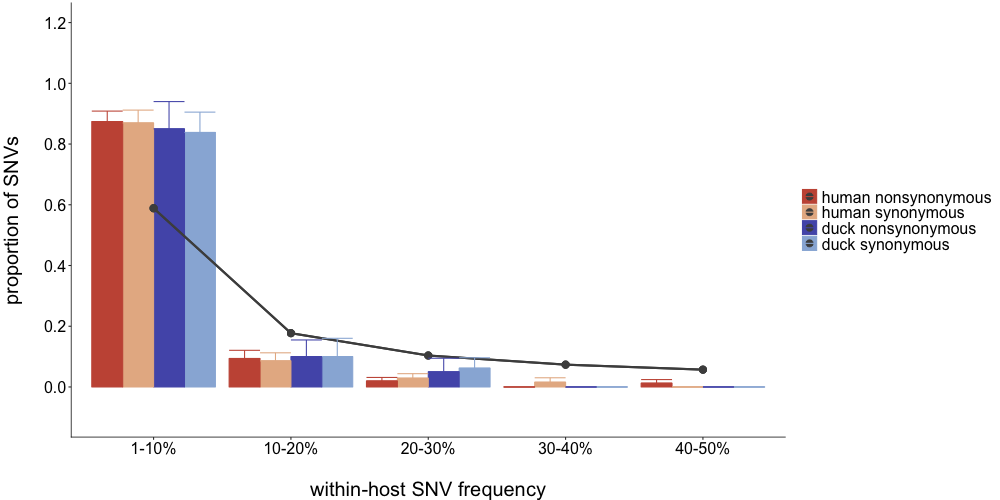

In [55]:
%%R -w 1000 -h 500 -u px -i freq_spec6,duck_nonsyn_color,duck_syn_color,human_nonsyn_color,human_syn_color  # this sets the size of the plot...otherwise, it will go off the page\n",
require(ggplot2)
library(ggplot2)

freq_spec6$speciesf = factor(freq_spec6$species, levels=c("human","duck"))
freq_spec6$colorf = factor(freq_spec6$color, levels=c("human_nonsynonymous","human_synonymous","duck_nonsynonymous","duck_synonymous"))

p3 <- ggplot(freq_spec6, aes(x=bin, y=mean, colour=colorf, fill=colorf))+
        geom_col(position="dodge")+
        geom_point(data=freq_spec6, aes(x=bin,y=expected), size=3, color="grey30")+
        geom_line(data=freq_spec6, aes(x=bin,y=expected, group=species), linetype=1, size=1, color="grey30")+
        geom_errorbar(data=freq_spec6, aes(x=bin, ymin = mean, ymax = mean + se_mean),position="dodge")+
        theme(panel.grid.major=element_line(colour=NA,size=NA))+
        theme(panel.grid.minor=element_line(colour=NA,size=NA))+
        theme(plot.title=element_text(size=13))+
        theme(strip.background = element_rect(colour=NA, fill=NA))+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+
        theme(axis.line.x=element_line(colour="black"))+
        theme(axis.line.y=element_line(colour="black"))+
        theme(axis.title.y=element_text(size=20, hjust=0.5, vjust=0.5))+
        theme(axis.title.x=element_text(size=20, vjust=0.5))+
        theme(axis.text.y=element_text(size=16, colour="black"))+
        theme(axis.text.x=element_text(hjust=0.5, size=16, colour="black"))+
        theme(legend.text=element_text(size=16))+
        theme(legend.title=element_blank())+
        #theme(legend.position = c(0.9, 0.6))+ # (0,0) is bottom left, (1,1) is top right
        theme(panel.margin=unit(1, "lines"))+
        theme(legend.key.size=unit(0.55, "cm"))+
        theme(panel.background=element_rect(fill=NA))+
        theme(legend.key=element_rect(fill=NA))+
        labs(x="\nwithin-host SNV frequency",y="proportion of SNVs\n")+
        scale_y_continuous(limits=c(-0.1,1.2), breaks=seq(0,1.2,0.2))+
        scale_shape_manual(values=c(19,4,1))+
        scale_color_manual(values=c(human_nonsynonymous=human_nonsyn_color, human_synonymous=human_syn_color,duck_nonsynonymous = duck_nonsyn_color, duck_synonymous = duck_syn_color),breaks = c("human_nonsynonymous", "human_synonymous","duck_nonsynonymous","duck_synonymous"),labels = c(" human nonsynonymous", " human synonymous"," duck nonsynonymous"," duck synonymous"))+
        scale_fill_manual(values=c(human_nonsynonymous=human_nonsyn_color, human_synonymous=human_syn_color,duck_nonsynonymous = duck_nonsyn_color, duck_synonymous = duck_syn_color),breaks = c("human_nonsynonymous", "human_synonymous","duck_nonsynonymous","duck_synonymous"),labels = c(" human nonsynonymous", " human synonymous"," duck nonsynonymous"," duck synonymous"))


ggsave("Fig-2b-freq-spectrum.pdf", p3, width = 8.5, height = 4, path="figure-PDFs")
p3

## SNP summary statistics

### Total number of different types of SNVs in humans and ducks 

In [42]:
h = snps_df[snps_df['species'] == "human"] 
print(len(h[h['synonymous_nonsynonymous']=='nonsynonymous']))
print(len(h[h['synonymous_nonsynonymous']=='synonymous']))
print(len(h[h['synonymous_nonsynonymous']=='stop_gained']))

111
91
4


In [43]:
d = snps_df[snps_df['species'] == "duck"] 
print(len(d[d['synonymous_nonsynonymous']=='nonsynonymous']))
print(len(d[d['synonymous_nonsynonymous']=='synonymous']))
print(len(d[d['synonymous_nonsynonymous']=='stop_gained']))

16
23
1


### Total number of unique SNPs in humans and ducks 

In [44]:
snps_df['nt_change'] = snps_df['gene'] + snps_df['reference_position'].astype(str) + snps_df['variant_allele']
human = snps_df[snps_df['species'] == "human"]
duck = snps_df[snps_df['species'] == "duck"]

len(set(duck['nt_change'])), len(set(human['nt_change']))

(40, 198)

In [47]:
snps_df['aa_site'] = snps_df['gene']+snps_df['coding_region_change'].replace('([A-z]+)', '', regex=True)
human = snps_df[snps_df['species'] == "human"]
duck = snps_df[snps_df['species'] == "duck"]

human.head()

,sampleid,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous_nonsynonymous,frequency(%),frequency,Unnamed: 10,species,color,bin,nt_change,aa_site
40,AA4KNL706F512_A_Cambodia_X0128304_2013_H5,A/Cambodia/X0128304/2013,HA,149,C,T,Thr41Ile,nonsynonymous,5.19%,0.0519,NaN,human,human_nonsynonymous,1-10%,HA149T,HA41
41,AA4KNL706F512_A_Cambodia_X0128304_2013_H5,A/Cambodia/X0128304/2013,HA,163,C,T,Gln46Stop,stop_gained,20.24%,0.2024,NaN,human,human_stop_gained,20-30%,HA163T,HA46
42,AA4KNL706F512_A_Cambodia_X0128304_2013_H5,A/Cambodia/X0128304/2013,HA,299,A,G,Glu91Gly,nonsynonymous,6.33%,0.0633,NaN,human,human_nonsynonymous,1-10%,HA299G,HA91
43,AA4KNL706F512_A_Cambodia_X0128304_2013_H5,A/Cambodia/X0128304/2013,HA,450,T,C,His141His,synonymous,5.69%,0.0569,NaN,human,human_synonymous,1-10%,HA450C,HA141
44,AA4KNL706F512_A_Cambodia_X0128304_2013_H5,A/Cambodia/X0128304/2013,HA,542,A,C,Lys172Thr,nonsynonymous,11.5%,0.1150,NaN,human,human_nonsynonymous,10-20%,HA542C,HA172


In [48]:
len(set(duck['aa_site'])), len(set(human['aa_site']))

(34, 188)

In [49]:
len(set(snps_df['aa_site']))

218

### Mean number of SNPs per sample for humans and ducks

In [114]:
# count the mean number of SNPs per sample for humans and ducks
mean_number_snps = pd.DataFrame(snps_df.groupby(["species", "sample"]).size())
mean_number_snps.reset_index(inplace=True)
mean_number_snps.columns = ['species','sample','number']

mean_snps_duck = mean_number_snps[mean_number_snps['species']=='duck']['number'].mean()
std_snps_duck = mean_number_snps[mean_number_snps['species']=='duck']['number'].std()

mean_snps_human = mean_number_snps[mean_number_snps['species']=='human']['number'].mean()
std_snps_human = mean_number_snps[mean_number_snps['species']=='human']['number'].std()

mean_snps_duck, std_snps_duck, mean_snps_human, std_snps_human

(8.0, 2.7386127875258306, 25.75, 18.96425208498498)

### Mean SNP frequencies for humans and ducks

In [101]:
### Mean number of SNPs per sample for humans and ducks

# count the mean number of SNPs per sample for humans and ducks
mean_number_snps = pd.DataFrame(snps_df.groupby(["species", "sample"]).size())
mean_number_snps.reset_index(inplace=True)
mean_number_snps.columns = ['species','sample','number']

mean_snps_duck = mean_number_snps[mean_number_snps['species']=='duck']['number'].mean()
std_snps_duck = mean_number_snps[mean_number_snps['species']=='duck']['number'].std()

mean_snps_human = mean_number_snps[mean_number_snps['species']=='human']['number'].mean()
std_snps_human = mean_number_snps[mean_number_snps['species']=='human']['number'].std()

mean_snps_duck, std_snps_duck, mean_snps_human, std_snps_human# calculate the mean and standard deviation SNP frequency for ducks
mean_snp_freq_duck = snps_df[snps_df['species'] == 'duck']['frequency'].mean()
std_snp_freq_duck = snps_df[snps_df['species'] == 'duck']['frequency'].std()
mean_snp_freq_duck, std_snp_freq_duck

(0.06692999999999999, 0.06465251180001658)

In [102]:
# calculate the mean and standard deviation SNP frequency for humans
mean_snp_freq_human = snps_df[snps_df['species'] == 'human']['frequency'].mean()
std_snp_freq_human = snps_df[snps_df['species'] == 'human']['frequency'].std()
mean_snp_freq_human, std_snp_freq_human

(0.057968932038834964, 0.05959261704005928)

#### T-test to compare whether humans and ducks have different SNP frequencies on average

In [105]:
a = snps_df[snps_df['species'] == 'duck']
a = a['frequency']
b = snps_df[snps_df['species'] == 'human']
b = b['frequency']
stats.ttest_ind(a, b, axis=0, equal_var=False)

Ttest_indResult(statistic=0.8121698412122093, pvalue=0.420350777870221)

#### Mann Whitney U test to compare differences in SNP frequencies 

Trevor suggested using this test instead of an unpaired t-test, because clearly our data are not normally distributed. 

In [107]:
# this runs the mann whitney u test
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=3613.0, pvalue=0.10936982766332526)

### Mean SNP frequencies for NS and S SNPs per species

In [108]:
# calculate the mean and standard deviation SNP frequency for ducks
mean_snp_freq_NS_duck = snps_df[(snps_df['species'] == 'duck') & (snps_df['synonymous_nonsynonymous'] == 'nonsynonymous')]['frequency'].mean()
mean_snp_freq_S_duck = snps_df[(snps_df['species'] == 'duck') & (snps_df['synonymous_nonsynonymous'] == 'synonymous')]['frequency'].mean()
std_snp_freq_NS_duck = snps_df[(snps_df['species'] == 'duck') & (snps_df['synonymous_nonsynonymous'] == 'nonsynonymous')]['frequency'].std()
std_snp_freq_S_duck = snps_df[(snps_df['species'] == 'duck') & (snps_df['synonymous_nonsynonymous'] == 'synonymous')]['frequency'].std()

mean_snp_freq_NS_duck, mean_snp_freq_S_duck, std_snp_freq_NS_duck, std_snp_freq_S_duck

(0.06898125, 0.0672391304347826, 0.06340058063614244, 0.06777620753848947)

In [109]:
# calculate the mean and standard deviation SNP frequency for humans
mean_snp_freq_NS_human = snps_df[(snps_df['species'] == 'human') & (snps_df['synonymous_nonsynonymous'] == 'nonsynonymous')]['frequency'].mean()
mean_snp_freq_S_human = snps_df[(snps_df['species'] == 'human') & (snps_df['synonymous_nonsynonymous'] == 'synonymous')]['frequency'].mean()
std_snp_freq_NS_human = snps_df[(snps_df['species'] == 'human') & (snps_df['synonymous_nonsynonymous'] == 'nonsynonymous')]['frequency'].std()
std_snp_freq_S_human = snps_df[(snps_df['species'] == 'human') & (snps_df['synonymous_nonsynonymous'] == 'synonymous')]['frequency'].std()

mean_snp_freq_NS_human, mean_snp_freq_S_human, std_snp_freq_NS_human, std_snp_freq_S_human

(0.05806666666666664,
 0.05653626373626373,
 0.06047226161011695,
 0.05804352105960093)

### Rerun, this time comparing human vs duck separated by synonymous and nonsynonymous

In [110]:
c = snps_df[snps_df['species'] == 'duck']
c = c[c['synonymous_nonsynonymous'] == 'nonsynonymous']
c = c['frequency']
d = snps_df[snps_df['species'] == 'human']
d = d[d['synonymous_nonsynonymous'] == 'nonsynonymous']
d = d['frequency']
stats.ttest_ind(c,d, axis=0, equal_var=False)

Ttest_indResult(statistic=0.6474652217803504, pvalue=0.5250186563058638)

In [111]:
# this runs the mann whitney u test
stats.mannwhitneyu(c,d)

MannwhitneyuResult(statistic=771.5, pvalue=0.1996659218159199)

In [112]:
e = snps_df[snps_df['species'] == 'duck']
e = e[e['synonymous_nonsynonymous'] == 'synonymous']
e = e['frequency']
f = snps_df[snps_df['species'] == 'human']
f = f[f['synonymous_nonsynonymous'] == 'synonymous']
f = f['frequency']
stats.ttest_ind(e,f, axis=0, equal_var=False)

Ttest_indResult(statistic=0.6956003747980034, pvalue=0.49191923568183327)

In [113]:
# this runs the mann whitney u test
stats.mannwhitneyu(d,f)

MannwhitneyuResult(statistic=4979.0, pvalue=0.43181209049022384)